In [1]:
!pip install ultralytics


In [4]:
!python.exe -m pip install --upgrade pip

In [2]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.53  Python-3.11.7 torch-2.5.1+cu121 CUDA:0 (NVIDIA RTX 3500 Ada Generation Laptop GPU, 12282MiB)
Setup complete  (32 CPUs, 63.7 GB RAM, 667.6/1843.8 GB disk)


In [3]:
import torch
import torchvision

print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("Is CUDA available?", torch.cuda.is_available())
print("CUDA version:", torch.version.cuda)


PyTorch version: 2.5.1+cu121
Torchvision version: 0.20.1+cu121
Is CUDA available? True
CUDA version: 12.1


In [4]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("PyTorch is using:", device)


PyTorch is using: cuda


In [5]:
torch.cuda.set_device(0)
print("Using GPU:", torch.cuda.get_device_name(0))


Using GPU: NVIDIA RTX 3500 Ada Generation Laptop GPU


In [6]:
from ultralytics import YOLO
from IPython.display import Image

In [7]:
!pip install roboflow

In [9]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="6poXdYyrFrSACnYvaNFT")
project = rf.workspace("ecs-hj1jt").project("linescanedgedetection")
version = project.version(1)
dataset = version.download("yolov11")
                           

loading Roboflow workspace...
loading Roboflow project...


In [11]:
dataset.location

'M:\\LineScanEdgeDetection-1'

In [12]:
import torch
torch.cuda.empty_cache()  


In [13]:
!nvidia-smi


Fri Apr 11 17:42:06 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.94                 Driver Version: 560.94         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA RTX 3500 Ada Gene...  WDDM  |   00000000:01:00.0  On |                  Off |
| N/A   47C    P8             11W /   35W |     650MiB /  12282MiB |     21%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [13]:
#import yaml

#data_path = f"{dataset.location}/data.yaml"
#with open(data_path, 'r') as f:
#    data = yaml.safe_load(f)

#print(data)


In [14]:
import torch
print("GPU Available:", torch.cuda.is_available())
print("Current Device:", torch.cuda.current_device())
print("Device Name:", torch.cuda.get_device_name(0))
print("PyTorch Running on:", "GPU" if torch.cuda.is_available() else "CPU")


GPU Available: True
Current Device: 0
Device Name: NVIDIA RTX 3500 Ada Generation Laptop GPU
PyTorch Running on: GPU


In [15]:
import torch
print(torch.__version__)  
print(torch.version.cuda)  


2.5.1+cu121
12.1


In [16]:
#!pip uninstall torch torchvision torchaudio -y
#!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121


In [17]:
import os

print("Train Path Exists:", os.path.exists("M:/LineScanEdgeDetection-1/train/images"))
print("Val Path Exists:", os.path.exists("M:/LineScanEdgeDetection-1/valid/images"))
print("Test Path Exists:", os.path.exists("M:/LineScanEdgeDetection-1/test/images"))


Train Path Exists: True
Val Path Exists: True
Test Path Exists: True


In [ ]:
#!jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10


Detection model

In [21]:
!yolo task=detect mode=train data="M://LineScanEdgeDetection-1/data.yaml" model="yolo11n.pt" epochs=100 imgsz=640 device=0 batch=4 


New https://pypi.org/project/ultralytics/8.3.96 available ðŸ˜ƒ Update with 'pip install -U ultralytics'
Ultralytics 8.3.53 ðŸš€ Python-3.11.7 torch-2.5.1+cu121 CUDA:0 (NVIDIA RTX 3500 Ada Generation Laptop GPU, 12282MiB)
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=M://LineScanEdgeDetection-1/data.yaml, epochs=100, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train30, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_m


train: Scanning M:\LineScanEdgeDetection-1\train\labels.cache... 1815 images, 595 backgrounds, 0 corrupt: 100%|##########| 1815/1815 [00:00<?, ?it/s]
train: Scanning M:\LineScanEdgeDetection-1\train\labels.cache... 1815 images, 595 backgrounds, 0 corrupt: 100%|##########| 1815/1815 [00:00<?, ?it/s]

val: Scanning M:\LineScanEdgeDetection-1\valid\labels.cache... 519 images, 171 backgrounds, 0 corrupt: 100%|##########| 519/519 [00:00<?, ?it/s]
val: Scanning M:\LineScanEdgeDetection-1\valid\labels.cache... 519 images, 171 backgrounds, 0 corrupt: 100%|##########| 519/519 [00:00<?, ?it/s]

  0%|          | 0/454 [00:00<?, ?it/s]
      1/100     0.669G      1.331      3.809      1.214         15        640:   0%|          | 0/454 [00:00<?, ?it/s]
      1/100     0.669G      1.331      3.809      1.214         15        640:   0%|          | 1/454 [00:00<05:06,  1.48it/s]
      1/100      0.69G      1.249      3.625      1.145         15        640:   0%|          | 1/454 [00:00<05:06,  1.48

In [28]:
import torch
from ultralytics import YOLO
import cv2

model_path = "runs/detect/train30/weights/best.pt"

model = YOLO(model_path)

image_path = "C:/Users/sk20.TU-CLAUSTHAL/Desktop/original.PNG"

image = cv2.imread(image_path)

results = model(image_path, save=True)

print("test done and the image saved.")
print("output path", results[0].save_dir)



image 1/1 C:\Users\sk20.TU-CLAUSTHAL\Desktop\original.PNG: 608x640 4 smooths, 47.9ms
Speed: 3.0ms preprocess, 47.9ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 640)
Results saved to runs\detect\predict9
✅ تست انجام شد! تصویر خروجی در مسیر زیر ذخیره شده:
📁 مسیر خروجی: runs\detect\predict9


In [ ]:
#!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=10 imgsz=640

In [ ]:
#github.com/ultralytics/ultralytics

In [ ]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600) #confusion matrix

In [ ]:
Image("/content/runs/detect/train/labels.jpg", width=600) #plot the labels, how many labels/classes we had.

In [ ]:
Image("/content/runs/detect/train/results.png", width=600) #evaluation matrix

In [ ]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600) #batch images

In [ ]:
#validation fine-tuned model
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

In [ ]:
#Inference with custom model on Images
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 , source={dataset.location}/test/images save=True

In [ ]:
# showing the detection
import glob
import os 
from IPython.display import Image as IPyImage, display

latest_folder= max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")
    

In [ ]:
#testing on one image
!gdown "image path" 

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25  , source=image.jpg save=True

In [ ]:
Image("/content/runs/detect/predict2/image.jpg", width=600)

In [ ]:
#Testing on video
!gdown "video's path"

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25  , source="video.mp4" save=True

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os 

#input video path
save_path= "/content/runs/detect/predict3/video.avi"

#Compressed video path
compressed_path= "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

#show video
mp4= open(compressed_path, 'rb').read()
data_url= "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
        <source src="%s" type="video/mp4">
</video>
""" % data_url)



Segmentation model

In [18]:
#segmentation model
#load the model (nano)
model= YOLO("yolo11n-seg.pt")

#train the model
train_results=model.train(
    data="M://LineScanEdgeDetection-1/data.yaml", #path to dataset YAML
    epochs=500, #number of training epochs
    imgsz= 640,#training images size
    device=0, #device to run on, device=0 or device=1,2,... or device=cpu
)

New https://pypi.org/project/ultralytics/8.3.107 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.53  Python-3.11.7 torch-2.5.1+cu121 CUDA:0 (NVIDIA RTX 3500 Ada Generation Laptop GPU, 12282MiB)
engine\trainer: task=segment, mode=train, model=yolo11n-seg.pt, data=M://LineScanEdgeDetection-1/data.yaml, epochs=500, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train21, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_ma



val: Scanning M:\LineScanEdgeDetection-1\valid\labels.cache... 519 images, 171 backgrounds, 0 corrupt: 100%|██████████|

Plotting labels to runs\segment\train21\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\segment\train21
Starting training for 500 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size




                Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105        0.8      0.595      0.757      0.464      0.799      0.594      0.755      0.425

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.608      0.628      0.654      0.372       0.63      0.615      0.654      0.344



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.412      0.293      0.215     0.0958      0.409       0.28      0.201     0.0808



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.647      0.751      0.735      0.445      0.657       0.72      0.716      0.377



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.646      0.679      0.681      0.369      0.628      0.657      0.655      0.314



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.413      0.147      0.129     0.0486      0.372       0.12      0.109     0.0342



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.623      0.684      0.699      0.336        0.6      0.682      0.679      0.296



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.491       0.47      0.495      0.263      0.481      0.451      0.477      0.227



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.703       0.75      0.759       0.42      0.708      0.732      0.746      0.364



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.779       0.81      0.865      0.566      0.785      0.813      0.864      0.516



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.742      0.802      0.858      0.556      0.745      0.802      0.857      0.497



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.522       0.46      0.452      0.232       0.51       0.44      0.426      0.207



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.768      0.812       0.85      0.557      0.783       0.82      0.862      0.526



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.745      0.773       0.82      0.537      0.762      0.766      0.824      0.498



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.767      0.782      0.851      0.549      0.777      0.784      0.855      0.518



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.801      0.792      0.854      0.568        0.8      0.795      0.849      0.519



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.737      0.649      0.742      0.459      0.763      0.637      0.745      0.429



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.759      0.796      0.846      0.516      0.764      0.767      0.843      0.488



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.772      0.795      0.862      0.568      0.782      0.802      0.869       0.53



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105       0.73       0.68      0.752       0.46      0.749       0.67      0.754      0.413



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.737      0.728      0.808      0.514      0.758      0.705      0.813      0.497



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.763      0.821      0.848      0.577      0.774      0.818      0.852      0.539



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.776      0.844      0.888      0.613      0.799      0.819      0.887      0.563



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.636      0.563      0.592      0.344       0.62      0.551      0.578      0.308



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.785      0.816      0.872      0.596      0.797      0.815      0.873      0.559



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105       0.72      0.763      0.786      0.517      0.723      0.761      0.786      0.477



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.775      0.802       0.87        0.6      0.772      0.801      0.868      0.551



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105       0.72      0.777       0.79      0.543      0.727      0.788      0.801      0.499



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.793       0.82      0.872      0.613      0.804      0.814      0.872      0.559



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.731      0.635      0.725      0.432      0.723       0.63      0.726       0.41



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.706      0.701      0.752      0.484      0.717      0.688      0.749      0.455



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.809      0.834      0.893      0.623      0.816      0.842      0.898      0.569



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.726      0.765      0.781      0.522      0.736      0.765      0.787      0.495



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.823      0.797      0.882      0.597       0.83      0.785       0.88      0.542



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.778      0.836      0.874      0.599      0.784      0.841      0.874      0.551



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.822        0.8      0.882      0.605       0.81      0.835      0.894      0.556



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.773      0.813      0.849      0.582      0.777      0.805      0.841       0.51



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.812      0.795      0.885      0.611       0.82      0.803      0.885       0.55



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.831      0.824      0.902      0.631      0.837       0.83      0.908      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.848      0.813      0.897      0.639      0.853      0.819      0.901      0.599



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.772      0.652      0.749      0.436      0.778      0.612      0.722      0.391



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.702      0.822      0.787      0.516      0.704      0.816      0.775       0.45



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.751      0.812      0.815      0.549       0.76      0.813      0.819      0.518



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.814      0.842      0.901      0.635      0.822      0.845      0.908       0.59



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.797      0.813      0.884      0.618      0.828        0.8      0.889      0.563



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.803      0.785      0.852      0.591       0.81      0.779      0.854      0.546



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.798       0.84      0.892      0.632      0.858      0.792      0.896      0.581



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.808      0.832      0.877       0.61      0.826      0.848      0.885      0.572



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105       0.81      0.795      0.856      0.582      0.818      0.802      0.864      0.539



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.803      0.827      0.885      0.623      0.806      0.831      0.887      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.784      0.786      0.863      0.572      0.782      0.774      0.858      0.537



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.761      0.722      0.793      0.507       0.76      0.698       0.78      0.469



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105        0.8      0.839      0.889       0.63      0.821      0.825      0.894      0.576



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.811      0.828      0.895      0.628      0.817      0.841      0.898      0.587



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.801      0.823      0.883      0.621      0.813      0.825      0.888      0.558



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.755      0.628      0.726      0.461      0.723      0.641      0.718      0.434



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.784      0.845      0.871      0.613      0.785      0.845      0.875      0.582



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.799      0.783      0.867      0.593      0.798      0.782      0.864      0.558



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.762      0.821      0.817      0.571      0.775      0.828      0.823      0.543



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.815      0.814       0.89       0.63      0.815      0.818      0.887      0.578



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.795      0.861        0.9      0.643        0.8      0.854      0.898      0.588



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.776      0.819      0.873      0.584      0.781      0.823      0.878      0.548



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.812      0.833      0.899      0.621      0.813      0.834      0.904      0.581



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.849      0.809      0.899      0.654      0.852      0.813      0.899      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.845      0.822      0.893      0.642      0.851      0.823      0.893      0.578



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.779      0.745      0.847      0.546      0.774      0.739      0.843      0.511



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.829      0.801      0.882      0.629      0.832        0.8      0.883      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.807      0.834      0.897      0.643      0.824      0.824      0.895      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.824      0.841      0.901      0.646      0.829      0.844      0.903      0.588



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.808      0.839      0.875      0.603       0.81      0.835      0.872      0.563



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.809      0.857      0.891      0.635       0.81       0.86      0.894      0.571



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.851      0.823      0.908      0.654      0.859       0.82      0.905      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.827      0.826      0.904      0.652      0.818      0.839      0.905      0.591



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.761      0.838      0.861      0.608      0.766      0.837      0.863      0.547



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.816       0.83      0.883       0.63      0.816      0.831      0.887      0.582



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.797      0.788      0.866      0.587      0.811       0.78      0.873      0.543



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.756      0.843      0.838      0.585      0.782      0.821      0.842      0.546



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.838      0.797      0.882      0.614       0.84      0.799      0.883      0.582



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105       0.85      0.788      0.883       0.61      0.845      0.785      0.876      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105       0.85      0.817      0.895      0.589      0.849      0.817      0.892      0.548



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.804      0.833      0.888      0.637      0.807      0.829      0.885      0.574



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.843      0.828      0.903      0.654      0.847       0.83      0.909        0.6



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.793      0.843       0.88      0.629      0.784      0.856      0.879      0.584



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.804      0.856      0.884      0.641       0.81      0.849      0.885      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.843      0.819      0.903      0.647      0.846      0.822      0.902      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.845      0.827      0.905      0.645      0.847       0.83      0.904      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.844      0.815      0.906      0.653      0.843      0.816      0.905      0.591



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.805      0.865      0.904      0.653      0.812      0.869      0.905      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.862       0.81      0.904       0.64      0.852      0.812      0.899      0.602



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.856       0.81      0.905      0.653      0.858      0.809      0.903      0.591



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.841      0.845      0.902      0.647      0.833       0.84      0.897      0.587



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.808      0.826      0.889      0.631      0.812      0.831      0.894      0.584



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.828      0.803      0.882      0.628      0.835      0.809      0.885      0.589



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.825      0.837      0.888      0.628      0.842      0.826      0.891      0.583



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.822      0.837      0.888      0.623      0.835      0.841      0.896      0.581



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105       0.85       0.82      0.906      0.647      0.851      0.837      0.913      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.801       0.84      0.892      0.649      0.825      0.835      0.903      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.855       0.82      0.904      0.659      0.858      0.827      0.913      0.618



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.836      0.835      0.905       0.63       0.85      0.835      0.905      0.581



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.831      0.832      0.898      0.643      0.819       0.84      0.902      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.816      0.818      0.888      0.632      0.804      0.834      0.888      0.587



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.817      0.837      0.897      0.646       0.83      0.837      0.898      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.825      0.838      0.905      0.644      0.841      0.825      0.908      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.823      0.814       0.89      0.626      0.836      0.815      0.895       0.58



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.853      0.837      0.914      0.658      0.859      0.835      0.915      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.814      0.829      0.884      0.635      0.842      0.824      0.894      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.822      0.827      0.897      0.643       0.83      0.825      0.896      0.586



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.843      0.832      0.906      0.658      0.842      0.826      0.904      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.812      0.844      0.899      0.655      0.825      0.839      0.907      0.598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.809      0.825      0.892      0.628      0.815      0.831      0.898      0.587



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.826      0.853      0.901      0.654      0.838      0.844      0.905      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.829      0.856      0.905      0.656       0.83      0.847      0.904      0.599



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.845      0.827      0.901      0.652      0.844      0.844      0.909      0.611



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.831      0.839      0.907      0.659      0.836      0.841      0.911      0.602



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.828      0.818      0.891      0.646      0.841      0.828        0.9      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.828      0.827      0.902      0.653      0.834      0.834       0.91       0.59



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.848      0.818      0.896      0.628      0.849      0.818      0.901      0.584



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.825      0.846      0.889      0.629      0.832       0.85      0.896       0.59



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.826      0.839       0.91      0.667      0.832      0.845      0.912      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.847      0.827      0.905      0.654      0.831      0.847      0.907      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.847      0.801      0.902       0.66       0.85      0.801      0.909      0.602



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105       0.83      0.838      0.899      0.645      0.837      0.835        0.9      0.581



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.832      0.834      0.899      0.651      0.837      0.842      0.904      0.602



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.831      0.825      0.894      0.639      0.837      0.829        0.9      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.864      0.838      0.908      0.661      0.869      0.844      0.911      0.615



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.841      0.836        0.9      0.661      0.841      0.839      0.902      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.839      0.821      0.894      0.648      0.844      0.826      0.894      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.851       0.82      0.901      0.645      0.861      0.812      0.905      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.834      0.842      0.902      0.663      0.836      0.844      0.903      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.817      0.845      0.907      0.644      0.861      0.805      0.913      0.599



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.846      0.827        0.9      0.652      0.848      0.834      0.904      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.828      0.845      0.904      0.657      0.842      0.834      0.904      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.861      0.808      0.898      0.641      0.857      0.823      0.905      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.845      0.817      0.898      0.653      0.839      0.832      0.903      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.843      0.828      0.906      0.665      0.863      0.821      0.911      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.838      0.846      0.906      0.661      0.847      0.844       0.91      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.821      0.849        0.9      0.665      0.837       0.85       0.91      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.822      0.853      0.904      0.659      0.866      0.825      0.912      0.611



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.833      0.851        0.9      0.656      0.853      0.835      0.902      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.846      0.816        0.9      0.649      0.856      0.828      0.907      0.594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.855      0.831      0.899      0.655       0.86      0.836      0.906        0.6



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.842      0.821      0.901      0.656       0.85      0.827      0.907      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.822      0.837      0.894      0.653      0.844      0.839      0.904       0.61



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.847      0.816      0.896      0.655       0.85      0.834      0.904      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105       0.84      0.851      0.904      0.664      0.844      0.854      0.908      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.832      0.825      0.898      0.655      0.845       0.83      0.909      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.836      0.842        0.9      0.666      0.836      0.849      0.909      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.792      0.864      0.902      0.658      0.799      0.869      0.909      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.804      0.867      0.903      0.662      0.807      0.877      0.912      0.625



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.837      0.848       0.91      0.665      0.842      0.858       0.92      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.822      0.843      0.899      0.657       0.84      0.842      0.909      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.833       0.83      0.904      0.663      0.837      0.834      0.907       0.61



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.841      0.845      0.906      0.661       0.85      0.849      0.912      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.833      0.842      0.901      0.658      0.834      0.835      0.903      0.616



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.853       0.83       0.91      0.656      0.851       0.83       0.91      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.819      0.841      0.902      0.669       0.82      0.843      0.906      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105       0.86      0.819      0.904      0.671      0.865      0.819      0.903      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.842       0.83      0.906      0.664      0.842      0.836      0.909      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.847      0.835        0.9      0.662      0.849      0.834      0.903      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.824      0.833      0.894      0.658      0.844      0.831      0.904      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.829      0.829      0.898       0.66      0.832      0.833        0.9      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.812      0.847      0.889      0.641      0.819      0.856      0.893      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.834      0.826       0.89      0.659      0.835      0.828      0.896      0.602



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105       0.81      0.852      0.897      0.665      0.816      0.851        0.9      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.797      0.862      0.896      0.662      0.811      0.855      0.901        0.6



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105       0.85      0.826      0.898      0.655      0.855       0.83      0.903      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.832      0.832        0.9      0.666      0.844      0.831      0.908      0.615



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.828      0.819      0.895      0.658      0.839      0.819      0.901      0.599



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105       0.83      0.827      0.893      0.655       0.83      0.836      0.898        0.6



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.838      0.825      0.894       0.66      0.843       0.83      0.902      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.825      0.846      0.897      0.658      0.848      0.838      0.906      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.829      0.843      0.905      0.658      0.839      0.848      0.907      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.858      0.829      0.908      0.668      0.862      0.831      0.909       0.61



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.826      0.856      0.904      0.658      0.825      0.855      0.907      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.821      0.858      0.906      0.654      0.824      0.862       0.91      0.599



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.852      0.811      0.899      0.661      0.862      0.822      0.907      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.831      0.818      0.895      0.659      0.839      0.824      0.901      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.817      0.837      0.891      0.659      0.829      0.844      0.899      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.841      0.836      0.911      0.667      0.841      0.839      0.913      0.614



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.825       0.84      0.906      0.668       0.84      0.835      0.907      0.614



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.838      0.833      0.901      0.655      0.833      0.845      0.905      0.602



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.823      0.836      0.893       0.66      0.844      0.822      0.894      0.598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.832      0.824      0.901      0.666      0.839      0.833      0.904      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.812      0.855      0.903      0.662      0.852      0.823      0.908      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.822      0.835      0.896      0.649       0.83      0.842      0.899      0.598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.813      0.858      0.901      0.661      0.836       0.84      0.904      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.804       0.86      0.905      0.655      0.828      0.843       0.91      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.845      0.839      0.901      0.658      0.846      0.839      0.904      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.813      0.851      0.893      0.657      0.823      0.842      0.898      0.598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.853      0.813      0.902      0.666      0.858      0.817        0.9      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.806      0.858      0.896      0.664      0.805      0.858        0.9      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.808      0.849       0.89      0.661      0.815      0.856      0.895      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.815      0.856      0.901      0.662      0.817      0.858      0.904      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.802       0.88        0.9      0.666      0.802      0.879      0.903      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.814      0.863      0.905      0.664      0.845      0.843      0.911      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.827      0.863      0.905      0.678      0.846      0.846      0.915       0.63



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.837      0.853        0.9      0.663      0.845      0.843      0.907      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.834      0.841      0.898      0.663      0.827      0.856      0.903      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.837      0.835        0.9      0.659      0.842      0.842      0.909      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.817      0.854      0.901      0.662      0.852      0.828      0.903      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.835      0.836      0.904      0.662      0.842      0.843       0.91      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.822      0.852      0.899      0.665       0.83      0.855      0.907      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.823      0.862      0.906       0.67      0.829      0.866      0.915      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.846      0.841      0.902      0.663      0.852      0.841      0.906      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.842      0.831      0.901      0.661      0.848      0.832      0.904      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.792      0.882      0.901      0.661      0.837       0.84      0.905      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.835      0.845      0.904      0.661      0.846      0.842      0.914      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.851      0.827      0.904      0.663      0.857      0.833      0.911      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.853      0.818      0.899       0.66       0.86      0.821      0.901      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.845      0.828        0.9      0.664      0.849      0.824      0.902      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.826      0.843      0.898      0.657       0.83       0.85      0.902      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.842      0.823      0.897      0.664      0.851      0.827      0.902      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.809      0.852      0.901       0.66      0.812       0.85      0.905       0.61



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105       0.85      0.825      0.899       0.66       0.86      0.829      0.904      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.837      0.829      0.898      0.661       0.84      0.832      0.898      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105        0.8      0.874      0.901       0.66      0.827      0.839      0.902      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.826      0.861      0.908      0.667      0.835      0.848      0.907       0.61



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.802      0.865      0.903       0.66       0.85      0.823      0.906      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.814      0.854      0.899      0.665      0.809      0.863        0.9      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.825       0.84      0.897      0.668      0.827      0.843      0.902      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105       0.82      0.841      0.896      0.664      0.828      0.848      0.906      0.611



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.804      0.856      0.891      0.659      0.809      0.859      0.895      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.837      0.832      0.892      0.656       0.85      0.835      0.901      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.831      0.861      0.898      0.665      0.831      0.856      0.902       0.61



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.821      0.845      0.893      0.665      0.839      0.842      0.901      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.842      0.839        0.9      0.664      0.845       0.84      0.907      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.846      0.834      0.901      0.664      0.851      0.844       0.91       0.61



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.843      0.827      0.896      0.664       0.85      0.833        0.9      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.851      0.829      0.898      0.664      0.855      0.834      0.905      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.849       0.83      0.899      0.665      0.858      0.836       0.91      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.832      0.838      0.899       0.66      0.841      0.848      0.907      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.818      0.857      0.899      0.661      0.825      0.855      0.904      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.829      0.838      0.898      0.659      0.838      0.841      0.901        0.6



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.831       0.85      0.901      0.659      0.837      0.854      0.904        0.6



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.814      0.856      0.895       0.66       0.83       0.86      0.901      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.826      0.839      0.897      0.663      0.827      0.839      0.899      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.811      0.861      0.902      0.666      0.818      0.866      0.905      0.611



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.845      0.822        0.9      0.667      0.839      0.827      0.903      0.611



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.795      0.874        0.9      0.665      0.803      0.861      0.903      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.799      0.865      0.901      0.667      0.803      0.868      0.905      0.611



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.804      0.862      0.903      0.664      0.807      0.863      0.905      0.611



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.818      0.846      0.904      0.665      0.802      0.867      0.906      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.806       0.85      0.897      0.661      0.818       0.85      0.901      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.827      0.833      0.899      0.668      0.833      0.839      0.903      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.841      0.829      0.902      0.668      0.845      0.833      0.907       0.61



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.826      0.825      0.896      0.663      0.799      0.868      0.904      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.834      0.831      0.898       0.66       0.84      0.834      0.904      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.828      0.846      0.898       0.66      0.842      0.831      0.901      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.824      0.849      0.898      0.664      0.836      0.844      0.901      0.602



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.835      0.839        0.9      0.666      0.839      0.842      0.903      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.847       0.82      0.897      0.663       0.84      0.835      0.903      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.822      0.833      0.893      0.659       0.83       0.84      0.899        0.6



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.827      0.824      0.892      0.662      0.835      0.831      0.898      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105       0.83      0.831      0.894      0.664      0.836      0.837        0.9      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.808      0.862      0.896      0.662       0.81      0.866      0.899      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.804      0.861      0.894      0.658      0.808      0.865      0.893      0.599



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.817      0.855        0.9      0.659       0.83       0.85      0.898      0.599



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105       0.83      0.843      0.896      0.661      0.822      0.848      0.898      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.828      0.845      0.899      0.663      0.831      0.846      0.898      0.599



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.827      0.832      0.894      0.662      0.844      0.829      0.894      0.599



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.826      0.831      0.896      0.659      0.829      0.834      0.897      0.599



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.833      0.821      0.896      0.663      0.838      0.826      0.895      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.827      0.836      0.898      0.661      0.832      0.842        0.9      0.599



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.809      0.846      0.894      0.662      0.813      0.849      0.896        0.6



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.797      0.858      0.894      0.663      0.803      0.861      0.897      0.598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.807      0.845      0.891      0.662      0.812      0.847      0.893      0.598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.805      0.845      0.893      0.665      0.861      0.797      0.894      0.602



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.837       0.81      0.893      0.666      0.853       0.81      0.895      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.814      0.845      0.895      0.667      0.823      0.838      0.897      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.821      0.846      0.897      0.667      0.831      0.854      0.902      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.826      0.839      0.901      0.668      0.815      0.851        0.9      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.818      0.842      0.899      0.663      0.845      0.828      0.899        0.6



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.799      0.871      0.895       0.66      0.838      0.842      0.899      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.836      0.837      0.897      0.666      0.844      0.845      0.904      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.805      0.858      0.895      0.662      0.854      0.824      0.901      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.833      0.836      0.898      0.662      0.839      0.832      0.901      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.812      0.866      0.899      0.663      0.811       0.87      0.902      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.842      0.835      0.897      0.663       0.85      0.833      0.903      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105       0.81      0.854      0.898      0.664      0.834       0.85      0.903      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.838      0.818      0.901      0.665      0.845      0.827      0.907      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.852      0.809      0.897      0.666      0.862      0.819      0.905      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.828      0.831      0.897      0.662      0.838      0.836      0.903      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.817      0.854      0.899      0.665      0.825      0.862      0.905      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.827      0.851      0.901      0.665       0.83      0.852      0.903       0.61



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.826       0.85      0.901      0.665      0.828      0.852      0.903      0.611



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.831      0.844        0.9      0.666      0.835      0.848      0.902       0.61



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.839      0.836        0.9      0.666      0.846      0.837      0.901      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.833      0.836      0.897      0.663      0.841       0.84      0.899      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.831       0.84      0.894      0.659      0.834      0.842      0.891      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.821      0.854      0.892      0.658      0.828      0.853      0.893      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105       0.82      0.851      0.891      0.662      0.824      0.854      0.893      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.838      0.848      0.895      0.663      0.839      0.849      0.894      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.834      0.845      0.896      0.663      0.838      0.845      0.895      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.836      0.832      0.897      0.665      0.841      0.839      0.898      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.844      0.823      0.894      0.667      0.845      0.831      0.896      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.824      0.844      0.893      0.664      0.836       0.85      0.897      0.605
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 196, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



296 epochs completed in 3.744 hours.
Optimizer stripped from runs\segment\train21\weights\last.pt, 6.0MB
Optimizer stripped from runs\segment\train21\weights\best.pt, 6.0MB

Validating runs\segment\train21\weights\best.pt...
Ultralytics 8.3.53  Python-3.11.7 torch-2.5.1+cu121 CUDA:0 (NVIDIA RTX 3500 Ada Generation Laptop GPU, 12282MiB)
YOLO11n-seg summary (fused): 265 layers, 2,834,958 parameters, 0 gradients, 10.2 GFLOPs



                Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        519       1105      0.827      0.862      0.905      0.678      0.859      0.839      0.916       0.63
                 sharp        237        461      0.835      0.858      0.892      0.699      0.873      0.844      0.914      0.652
                smooth        176        644      0.819      0.866      0.918      0.656      0.845      0.834      0.918      0.609
Speed: 0.3ms preprocess, 5.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs\segment\train21


### from ultralytics import YOLO  

# Load the trained model from train17 as a base
model = YOLO("runs/segment/train17/weights/best.pt")  

# Train the model with updated dataset and class weights
train_results = model.train(
    data="M://Edge-Detection-2/data.yaml", 
    epochs=200,  
    imgsz=640,  
    device=0,   
    pretrained=True 
)

In [19]:
from IPython.display import Image

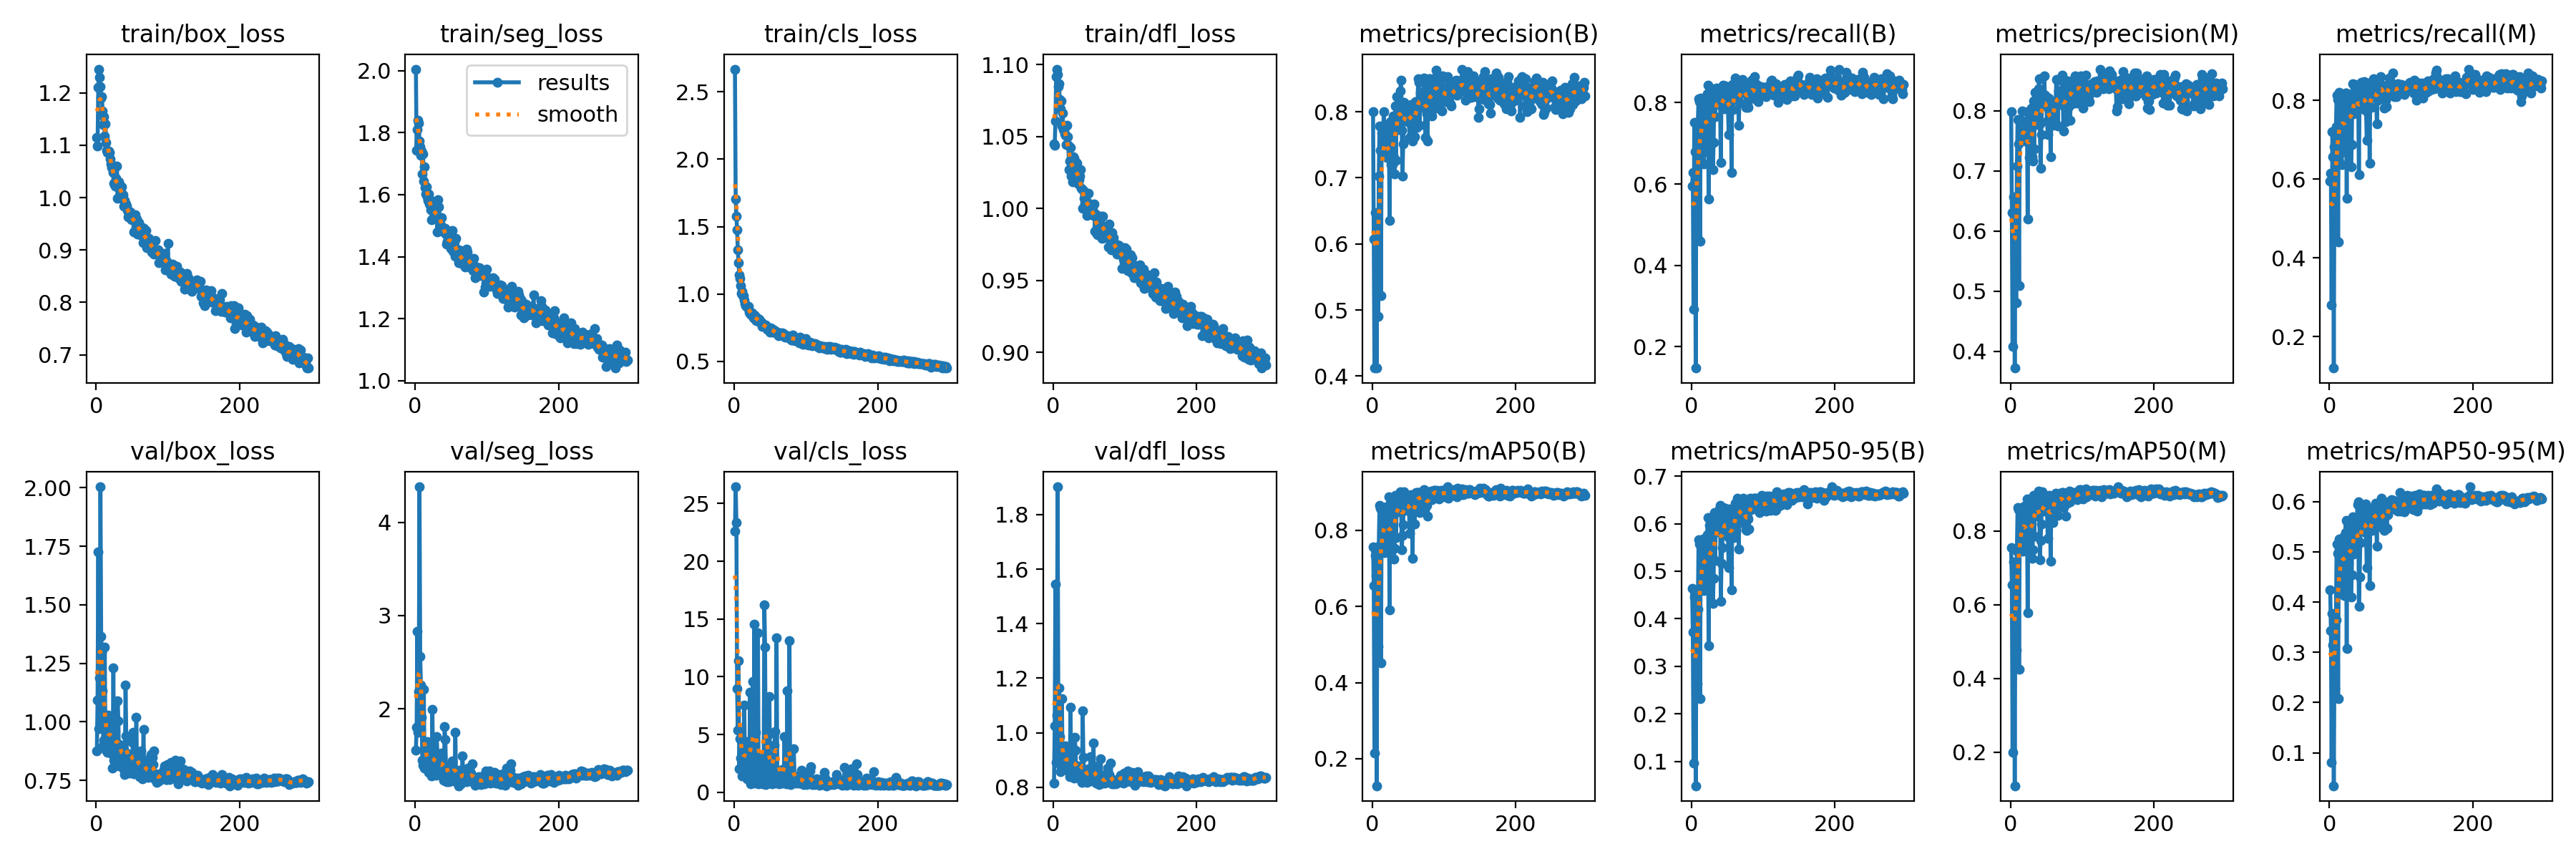

In [20]:
Image("M:/runs/segment/train21/results.png", width=600)

In [22]:
model=YOLO("M:/runs/segment/train21/weights/best.pt")
results=model("C:/Users/sk20.TU-CLAUSTHAL/Desktop/edge-1.jpg", save=True)
results[0].show()



image 1/1 C:\Users\sk20.TU-CLAUSTHAL\Desktop\edge-1.jpg: 480x640 5 sharps, 2 smooths, 48.0ms
Speed: 2.0ms preprocess, 48.0ms inference, 11.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs\segment\predict43


In [ ]:
# Parse detection results

sharp_detected = False
class_names = results[0].names

# Check each detected object
for box in results[0].boxes.data:
    class_id = int(box[5])
    confidence = float(box[4])
    label = class_names[class_id]

    if label.lower() == "sharp" and confidence > 0.8:
        sharp_detected = True
        break

In [ ]:
# Connect to PLC if sharp object detected 
if sharp_detected:
    try:
        client = Client("Your PLC IP")  # <-- Replace with your PLC IP
        client.connect()

        print("Connected to OPC UA server.")

        shutdown_node = client.get_node("Your PLC node")  # <-- Replace with your PLC node
        shutdown_node.set_value(True)

        print("Sharp object detected. Shutdown signal sent to PLC.")

        client.disconnect()

    except Exception as e:
        print("Error while sending data to PLC:", e)

else:
    print("No sharp object with high confidence detected.")

In [41]:
# video with line scan and mix of material.

model=YOLO("M:/runs/segment/train21/weights/best.pt")
results=model("C:/Users/sk20.TU-CLAUSTHAL/Desktop/video-3_LW3TB9v4.avi", save=True)
results[0].show()



WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/3601) C:\Users\sk20.TU-CLAUSTHAL\Desktop\video-3_LW3TB9v4.avi: 480x640 1 sharp, 49.0ms
video 1/1 (frame 2/3601) C:\Users\sk20.TU-CLAUSTHAL\Desktop\video-3_LW3TB9v4.avi: 480x640 1 sharp, 18.9ms
video 1/1 (frame 3/3601) C:\Users\sk20.TU-CLAUSTHAL\Desktop\video-3_LW3TB9v4.avi: 480x640 1 sharp, 16.0ms
video 1/1 (frame 4/3601) C:\Users\sk20.TU-CLAUSTHAL\Desktop\video-3_LW3TB9v4.avi: 480x640 1 sharp, 39.0ms
video 1/1 (frame 5/3601) C:\Users\